In [7]:
import os
import numpy as np
import pickle

import matplotlib.pyplot as plt

from bcnf.utils import get_dir
from bcnf.simulation.sampling import generate_data_old

In [8]:
T = 2
dt = 0.01

In [9]:
with open(os.path.join(get_dir('data', 'new-trajectories', 'train'), 'split-0.pkl'), 'rb') as f:
    data = pickle.load(f)

In [10]:
data.keys()

dict_keys(['x0_x', 'x0_y', 'x0_z', 'v0_x', 'v0_y', 'v0_z', 'g_x', 'g_y', 'g_z', 'w_x', 'w_y', 'w_z', 'b', 'm', 'a_x', 'a_y', 'a_z', 'cam_radian_array', 'r', 'A', 'Cd', 'rho', 'cam_radius', 'cam_angles', 'cam_heights', 'trajectories'])

In [13]:
X = np.array(data['trajectories'])
X.shape

(3000, 200, 3)

Text(0.5, 0.98, 'New Sampling')

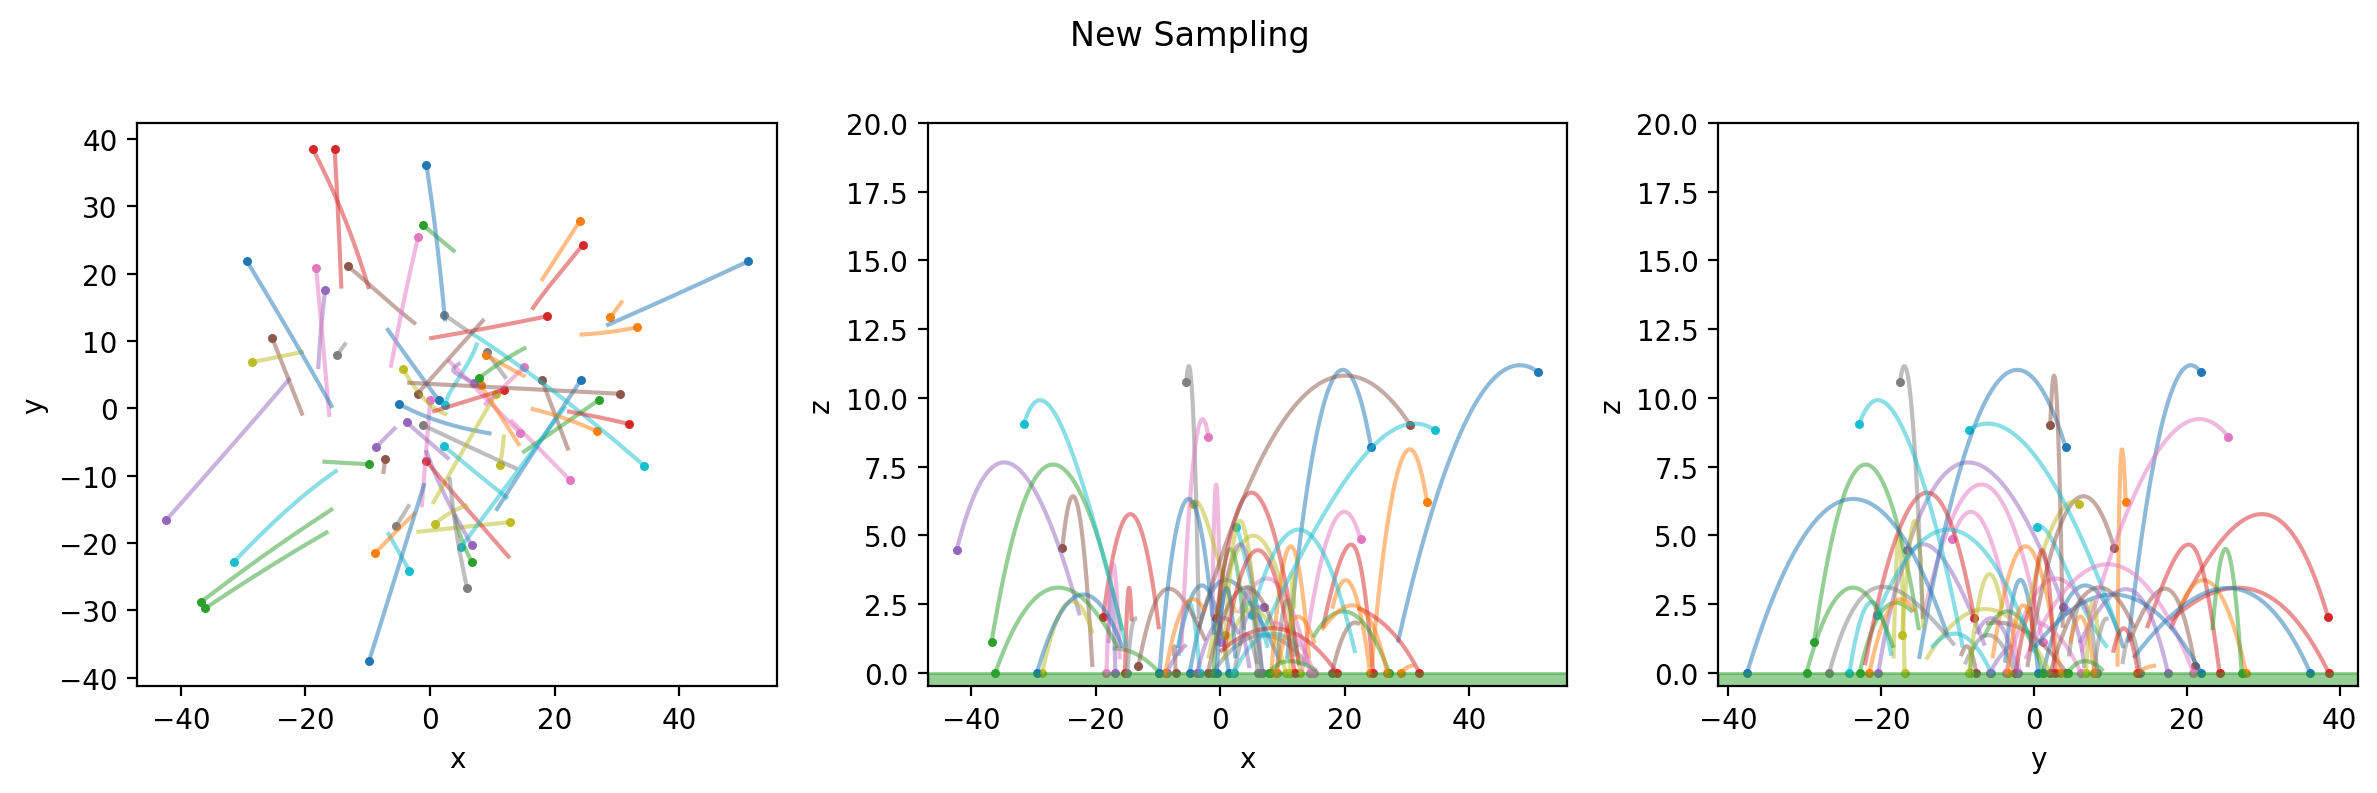

In [18]:
N_TRAJECTORIES = 64

fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=200)

for ax, (i, j), (iname, jname) in zip(axes, [(0, 1), (0, 2), (1, 2)], [("x", "y"), ("x", "z"), ("y", "z")]):
    for k in range(N_TRAJECTORIES):
        ax.plot(X[k, :, i], X[k, :, j], alpha=0.5, color=f'C{k%10}')
        ax.scatter(X[k, -1, i], X[k, -1, j], s=5, color=f'C{k%10}')
    ax.set_xlabel(iname)
    ax.set_ylabel(jname)

    if j == 2:
        # Draw the ground
        ax.axhspan(-10, 0, color="tab:green", alpha=0.5)

        ax.set_ylim(-0.5, 20)

fig.tight_layout()
fig.subplots_adjust(top=0.85)
fig.suptitle("New Sampling")

In [15]:
X.shape

(3000, 200, 3)

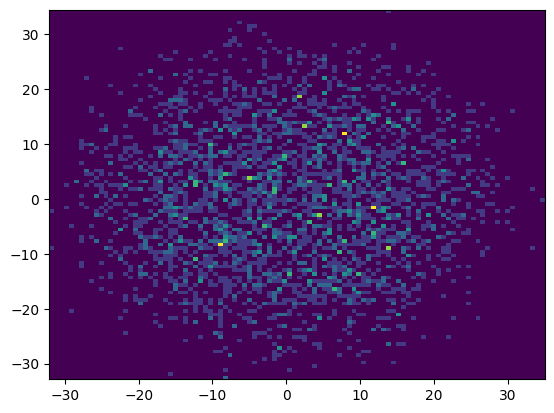

In [16]:
plt.hist2d(X[:,0, 0], X[:, 0, 1], bins=100,);